<a href="https://colab.research.google.com/github/riamary18/PetBond/blob/main/Predicting_Dog_Breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries and folders

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import os

In [9]:
import zipfile
zipref=zipfile.ZipFile('drive/MyDrive/Dog Vision/dog-breed-identification.zip')
zipref.extractall('drive/MyDrive/Dog Vision/dog-breed-identification')
zipref.close()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Analysing Dataset
The dataset is taken from Kaggle:
https://www.kaggle.com/c/dog-breed-identification/data


In [11]:
labels_csv=pd.read_csv('drive/MyDrive/Dog Vision/dog-breed-identification/labels.csv')
labels_csv

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [12]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126

<Axes: >

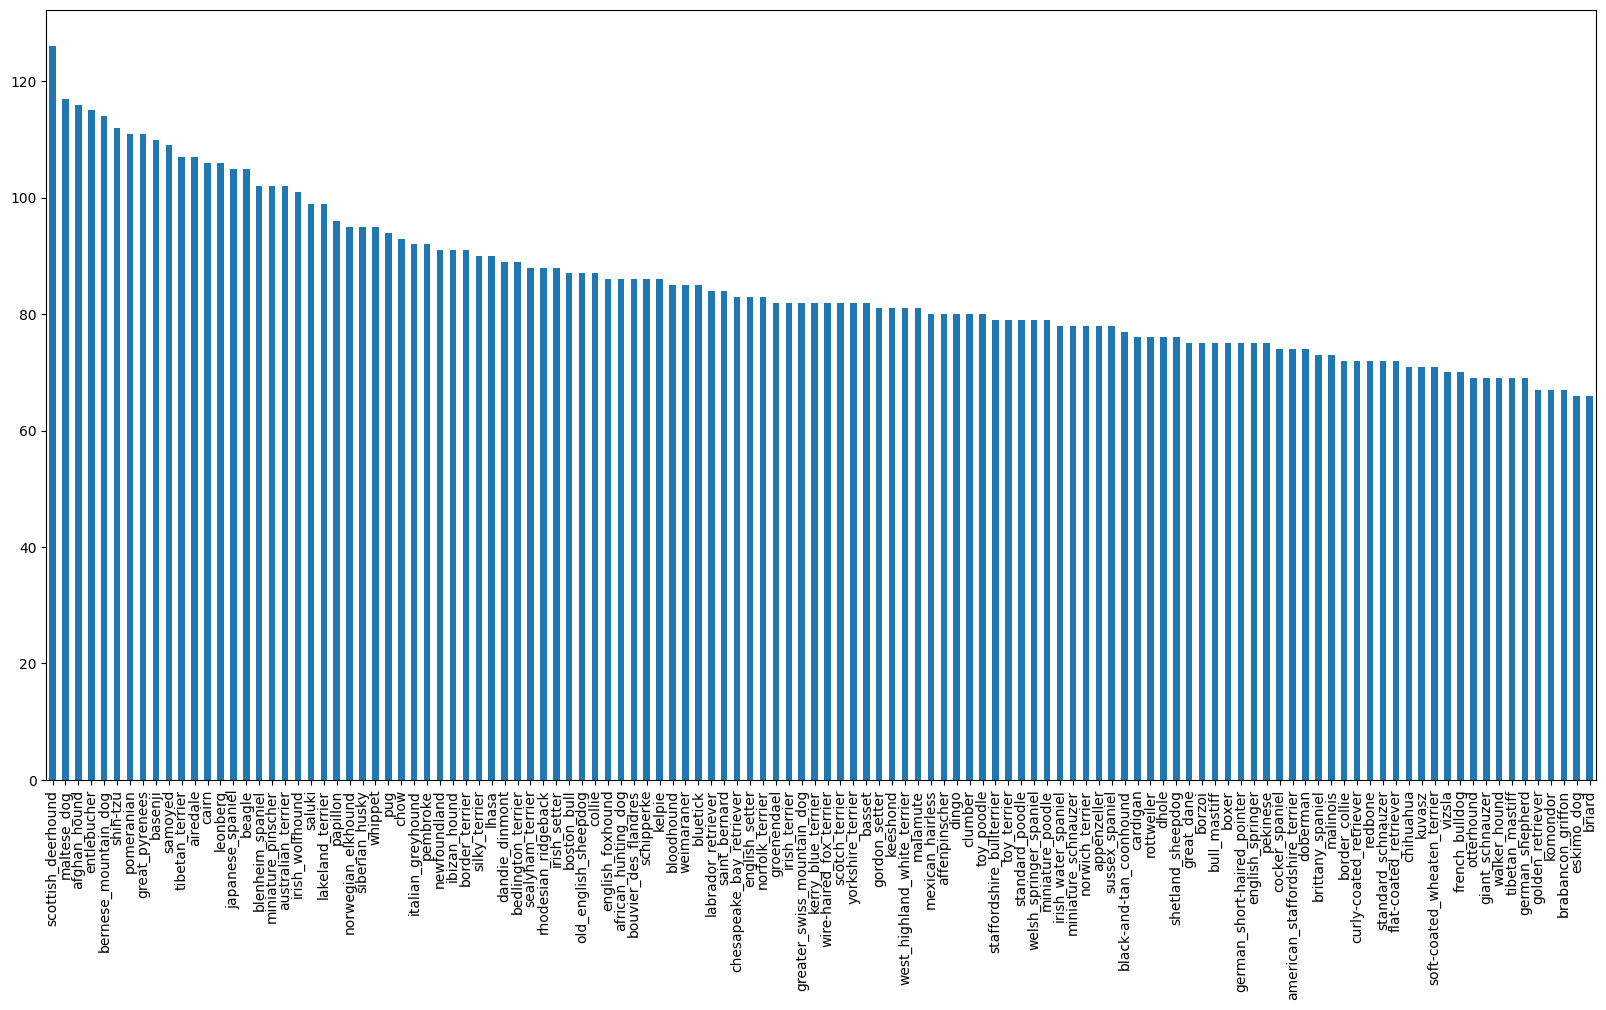

In [13]:
labels_csv['breed'].value_counts().plot(kind='bar',figsize=(20,10))

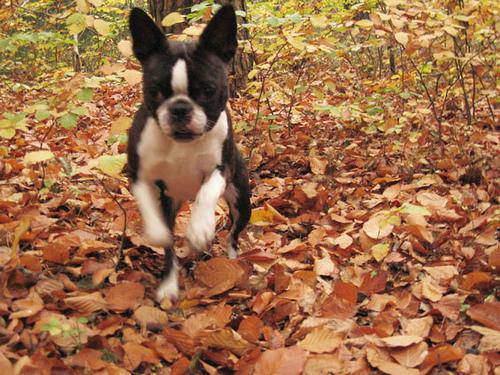

In [14]:
from IPython.display import Image
Image('drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

##Extracting the filenames and labels

In [15]:
filenames=['drive/MyDrive/Dog Vision/dog-breed-identification/train/'+x+'.jpg' for x in labels_csv['id']]
filenames[:10]

['drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [16]:
#Checking if the number of filenames equals number of images in the train directory
if (len(os.listdir('drive/MyDrive/Dog Vision/dog-breed-identification/train'))==len(filenames)):
  print("Equal number of filenames")
else:
  print("Unequal number of filenames")

Equal number of filenames


In [17]:
labels=np.array(labels_csv['breed'])

In [18]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [19]:
boolean_labels=[label==unique_breeds for label in labels]
# argmax will be used to identify which unique_breed is identified in the boolean_labels
boolean_labels[0], boolean_labels[0].argmax()

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 19)

In [20]:
#Checking if the number of boolean labels equals number of images in the train directory
if (len(os.listdir('drive/MyDrive/Dog Vision/dog-breed-identification/train'))==len(boolean_labels)):
  print("Equal number of boolean labels")
else:
  print("Unequal number of boolean labels")

Equal number of boolean labels


##Splitting the data into training and validation sets
Since the dataset hasn't provided us with a validation set, we will create one from the training set.

In [21]:
#Setup x and y variables
x=filenames
y=boolean_labels

In [22]:
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,shuffle=False,random_state=42)
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

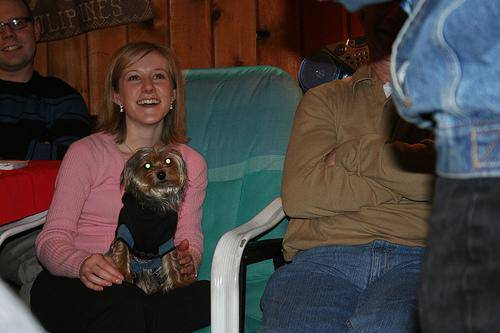

In [24]:
from IPython.display import Image
Image('drive/MyDrive/Dog Vision/dog-breed-identification/train/1548eb783093ac6bdf011d07f3370a36.jpg')

In [25]:
x_val[76],unique_breeds[np.argmax(y_val[76])]

('drive/MyDrive/Dog Vision/dog-breed-identification/train/1548eb783093ac6bdf011d07f3370a36.jpg',
 'yorkshire_terrier')

##Preprocessing Images

In [26]:
from matplotlib.pyplot import imread
image=imread(filenames[0])
image.shape

(375, 500, 3)

In [27]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]]], dtype=uint8)>

In [28]:
#Create a function to process the images
IMG_SIZE=224
def process_image(filepath,size=IMG_SIZE):
  image=tf.io.read_file(filepath)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

Define a function to turn our data into tuples of Tensors of the form: `(image,label)`

In [29]:
def get_image_label(filepath,label):
  image=process_image(filepath)
  return image,label

##Turning our data into batches

In [30]:
BATCH_SIZE=32
def get_batches(x,y=None,size=BATCH_SIZE,val_data=False,test_data=False):
  #If test data:
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  #If validation data:
  elif val_data:
    print("Creating validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
  return data_batch

In [31]:
#Creating training and validation data batches
train_data=get_batches(x_train,y_train)
val_data=get_batches(x_val,y_val)

Creating training data batches...
Creating training data batches...


In [32]:
#Checking the attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

##Visualizing our Data

In [33]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  plt.figure(figsize=(10,10))
  #Loop through 25 (for displaying 25 images)
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')

In [34]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

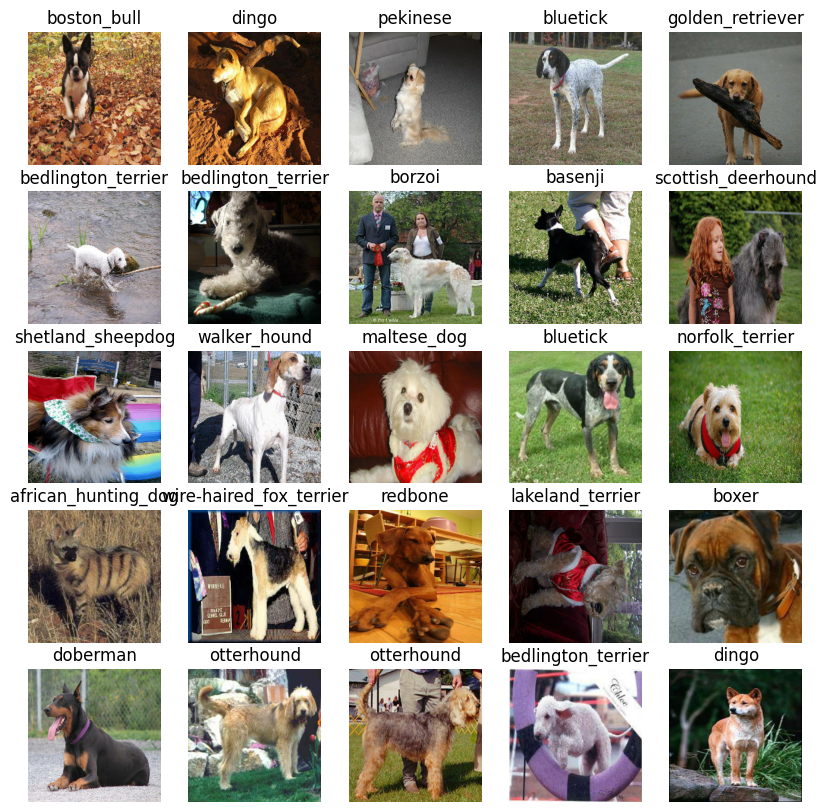

In [35]:
#Visualise training data
train_images,train_labels=next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

In [36]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

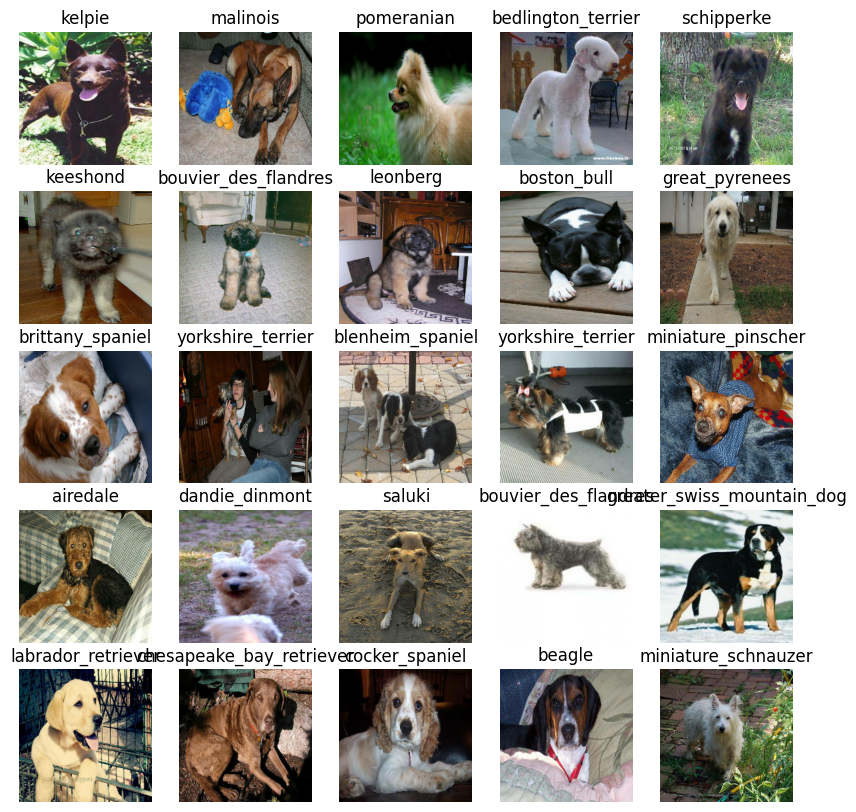

In [37]:
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

##Building a Model
We will be using MobileNetV2 model. It is a convolutional neural network (CNN) architecture designed for efficient and lightweight deep learning models. It is an evolution of the original MobileNet architecture, specifically tailored for mobile and edge devices with limited computational resources.

In [38]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_breeds)
MODEL_URL='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [39]:
def create_model(inp_shape=INPUT_SHAPE,op_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer 1(input layer)
      tf.keras.layers.Dense(units=64,activation='relu'),
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation='softmax') #Layer 2(output layer)
  ])
  #Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  #Build the model
  model.build(INPUT_SHAPE)

  return model

In [40]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 64)                64128     
                                                                 
 dense_1 (Dense)             (None, 120)               7800      
                                                                 
Total params: 5504641 (21.00 MB)
Trainable params: 71928 (280.97 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


##Creating Callbacks

In [41]:
#Callback to stop model from training after it reaches accuracy of 98%
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('val_accuracy') > 0.98:
            print("Model will stop training now..")
            self.model.stop_training = True
callbacks=Callbacks()

In [42]:
#Early Stopping Callbacks
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

##Training a Model (on subset of data)

In [43]:
NUM_EPOCHS = 40 #@param {type:"slider", min:10, max:100, step:10}
#You can adjust the number of epochs on the slider on the right

In [44]:
def train_model():
  model=create_model()
  model.fit(
      x=train_data,
      epochs=NUM_EPOCHS,
      validation_data=val_data,
      validation_freq=1,
      callbacks=[callbacks]
  )
  return model

In [108]:
model=train_model()

Epoch 1/40
25/25 [==============================] - 7s 157ms/step - loss: 4.6587 - accuracy: 0.0575 - val_loss: 4.2759 - val_accuracy: 0.1050
Epoch 2/40
25/25 [==============================] - 4s 159ms/step - loss: 3.0949 - accuracy: 0.4412 - val_loss: 3.5020 - val_accuracy: 0.2550
Epoch 3/40
25/25 [==============================] - 4s 165ms/step - loss: 1.8327 - accuracy: 0.6737 - val_loss: 2.7465 - val_accuracy: 0.4250
Epoch 4/40
25/25 [==============================] - 4s 167ms/step - loss: 0.9296 - accuracy: 0.8625 - val_loss: 2.2578 - val_accuracy: 0.4750
Epoch 5/40
25/25 [==============================] - 4s 173ms/step - loss: 0.4676 - accuracy: 0.9538 - val_loss: 2.0067 - val_accuracy: 0.5200
Epoch 6/40
25/25 [==============================] - 4s 147ms/step - loss: 0.2611 - accuracy: 0.9875 - val_loss: 1.8858 - val_accuracy: 0.5450
Epoch 7/40
25/25 [==============================] - 4s 167ms/step - loss: 0.1616 - accuracy: 0.9987 - val_loss: 1.8284 - val_accuracy: 0.5500
Epoch 

We have to train 25 batches, as our training dataset has 800 images and our batch size is 32.

##Making and evaluating predictions using a trained model

In [109]:
predictions=model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 109ms/step


array([[2.83456575e-06, 7.11816392e-06, 5.43458620e-03, ...,
        5.15525026e-05, 2.19891681e-05, 2.03133950e-05],
       [1.06254396e-04, 1.20000495e-05, 7.54310577e-07, ...,
        5.84965392e-07, 1.15299008e-06, 1.98044540e-06],
       [6.69487854e-05, 5.58776355e-06, 2.52949831e-05, ...,
        1.33485810e-06, 1.14418788e-06, 1.82119373e-04],
       ...,
       [1.34302900e-06, 4.44917077e-06, 9.59137481e-08, ...,
        5.52680000e-08, 6.25732355e-08, 2.00256324e-07],
       [4.96541588e-06, 1.72058528e-03, 2.36770301e-08, ...,
        1.25681947e-06, 2.53943585e-06, 2.39779797e-06],
       [1.65801680e-06, 2.09015684e-06, 1.25096392e-06, ...,
        2.02139049e-07, 1.04193680e-03, 2.97111706e-06]], dtype=float32)

In [110]:
predictions[0]

array([2.83456575e-06, 7.11816392e-06, 5.43458620e-03, 1.31384179e-04,
       6.60159287e-07, 2.69019220e-05, 2.77512499e-05, 1.81607029e-05,
       1.13615990e-07, 1.33147864e-07, 1.80227089e-05, 1.48963853e-04,
       1.82981821e-05, 7.66722934e-08, 8.78788633e-05, 5.63599997e-07,
       9.13162182e-07, 1.57549403e-05, 5.47739262e-07, 7.14345151e-05,
       3.58114605e-08, 3.06860741e-08, 6.31758594e-05, 3.10351396e-07,
       2.04554541e-04, 7.34857110e-07, 4.16462882e-07, 5.22519753e-04,
       1.08465261e-03, 5.73895872e-03, 2.18157965e-07, 2.93899642e-08,
       5.29825911e-07, 6.19358752e-06, 2.81081768e-04, 6.22911944e-09,
       9.35880188e-03, 5.06466196e-04, 1.86657568e-03, 8.29123223e-08,
       1.56230029e-09, 1.99355190e-06, 4.31756598e-06, 1.40690202e-06,
       7.71600986e-04, 3.26252011e-05, 2.90423432e-05, 5.51079256e-06,
       3.94894997e-08, 1.41440207e-04, 1.05091909e-04, 6.11323867e-06,
       1.32261789e-06, 6.41095903e-06, 5.01136936e-04, 1.81753523e-04,
      

In [111]:
index=0
print(predictions[index])
print(f'Max value (probability of prediction):{np.max(predictions[index])}')
print(f'Sum:{np.sum(predictions[index])}')
print(f'Max index:{np.argmax(predictions[index])}')
print(f'Predicted label:{unique_breeds[np.argmax(predictions[index])]}')

[2.83456575e-06 7.11816392e-06 5.43458620e-03 1.31384179e-04
 6.60159287e-07 2.69019220e-05 2.77512499e-05 1.81607029e-05
 1.13615990e-07 1.33147864e-07 1.80227089e-05 1.48963853e-04
 1.82981821e-05 7.66722934e-08 8.78788633e-05 5.63599997e-07
 9.13162182e-07 1.57549403e-05 5.47739262e-07 7.14345151e-05
 3.58114605e-08 3.06860741e-08 6.31758594e-05 3.10351396e-07
 2.04554541e-04 7.34857110e-07 4.16462882e-07 5.22519753e-04
 1.08465261e-03 5.73895872e-03 2.18157965e-07 2.93899642e-08
 5.29825911e-07 6.19358752e-06 2.81081768e-04 6.22911944e-09
 9.35880188e-03 5.06466196e-04 1.86657568e-03 8.29123223e-08
 1.56230029e-09 1.99355190e-06 4.31756598e-06 1.40690202e-06
 7.71600986e-04 3.26252011e-05 2.90423432e-05 5.51079256e-06
 3.94894997e-08 1.41440207e-04 1.05091909e-04 6.11323867e-06
 1.32261789e-06 6.41095903e-06 5.01136936e-04 1.81753523e-04
 1.23472884e-02 7.65698205e-05 9.55664364e-05 3.02485745e-07
 7.19422096e-05 2.93895597e-09 1.09875373e-10 7.49636173e-01
 2.78186434e-08 7.708609

In [112]:
predictions.shape

(200, 120)

The shape is (200,120) because the shape of y_val is 200 and the shape of unique_breeds is 120.

In [113]:
#Turning the prediction probabilities into their respective labels
def get_pred_labels(prediction_prob):
  return unique_breeds[np.argmax(prediction_prob)]

#Test example
pred_label=get_pred_labels(predictions[81])
pred_label

'irish_terrier'

Our validation data is in batches right now, we have to unbatchify it to make predictions on the validation images and then compare it to the validation labels.

In [114]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [115]:
#Create a functin to unbatch a batch dataset
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

In [116]:
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.8355043 , 0.98298323, 0.70532215],
         [0.7773548 , 0.94725144, 0.6567314 ],
         [0.72830886, 0.9062676 , 0.6305935 ],
         ...,
         [0.5036765 , 0.6010855 , 0.48595938],
         [0.24266894, 0.34007794, 0.22495186],
         [0.11470589, 0.21211486, 0.0969888 ]],
 
        [[0.6267507 , 0.8260505 , 0.5357143 ],
         [0.6932073 , 0.8988796 , 0.60865724],
         [0.7595764 , 0.9580533 , 0.69399947],
         ...,
         [0.21892071, 0.31492913, 0.22242212],
         [0.09321605, 0.18922445, 0.09671745],
         [0.16456583, 0.26057425, 0.16806723]],
 
        [[0.40098044, 0.6521009 , 0.3721289 ],
         [0.45759374, 0.7125263 , 0.43192846],
         [0.51861   , 0.7825106 , 0.5060531 ],
         ...,
         [0.27365196, 0.36657035, 0.30824578],
         [0.11444326, 0.20421043, 0.1490371 ],
         [0.1497199 , 0.24460787, 0.18431373]],
 
        ...,
 
        [[0.94565725, 0.9590328 , 0.8931364 ],
         [0.93780744, 0.9536863 , 0.88403

In [117]:
#Define a function which will help plot the prediction, ground truth and image in a single plot
def plot_pred(prediction_probabilities,labels,images,n=1):
  pred_prob,truth_label,image=prediction_probabilities[n],labels[n],images[n]
  #Get prediction label
  pred_label = get_pred_labels(pred_prob)
  # Plot image
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  #Change the colour of the title depending on if the prediction is right or wrong
  if pred_label==truth_label:
    color='green'
  else:
    color='red'
  #Change plot title to be predicted, prediction probability and truth label
  plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    truth_label),
            color=color)

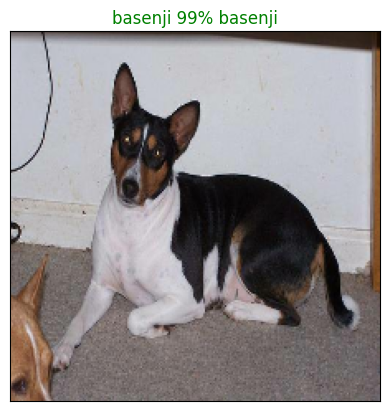

In [118]:
plot_pred(predictions,val_labels,val_images,31)

In [119]:
def plot_pred_conf(predictions,labels,n=1):
  pred_prob,truth_label=predictions[n],labels[n]
  pred_label=get_pred_labels(pred_prob)
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]

  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  if np.isin(truth_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==truth_label)].set_color('green')
  else:
    pass

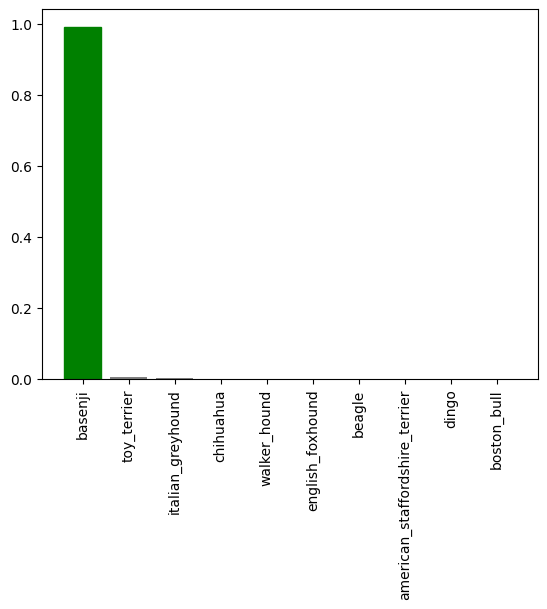

In [120]:
plot_pred_conf(predictions,val_labels,31)

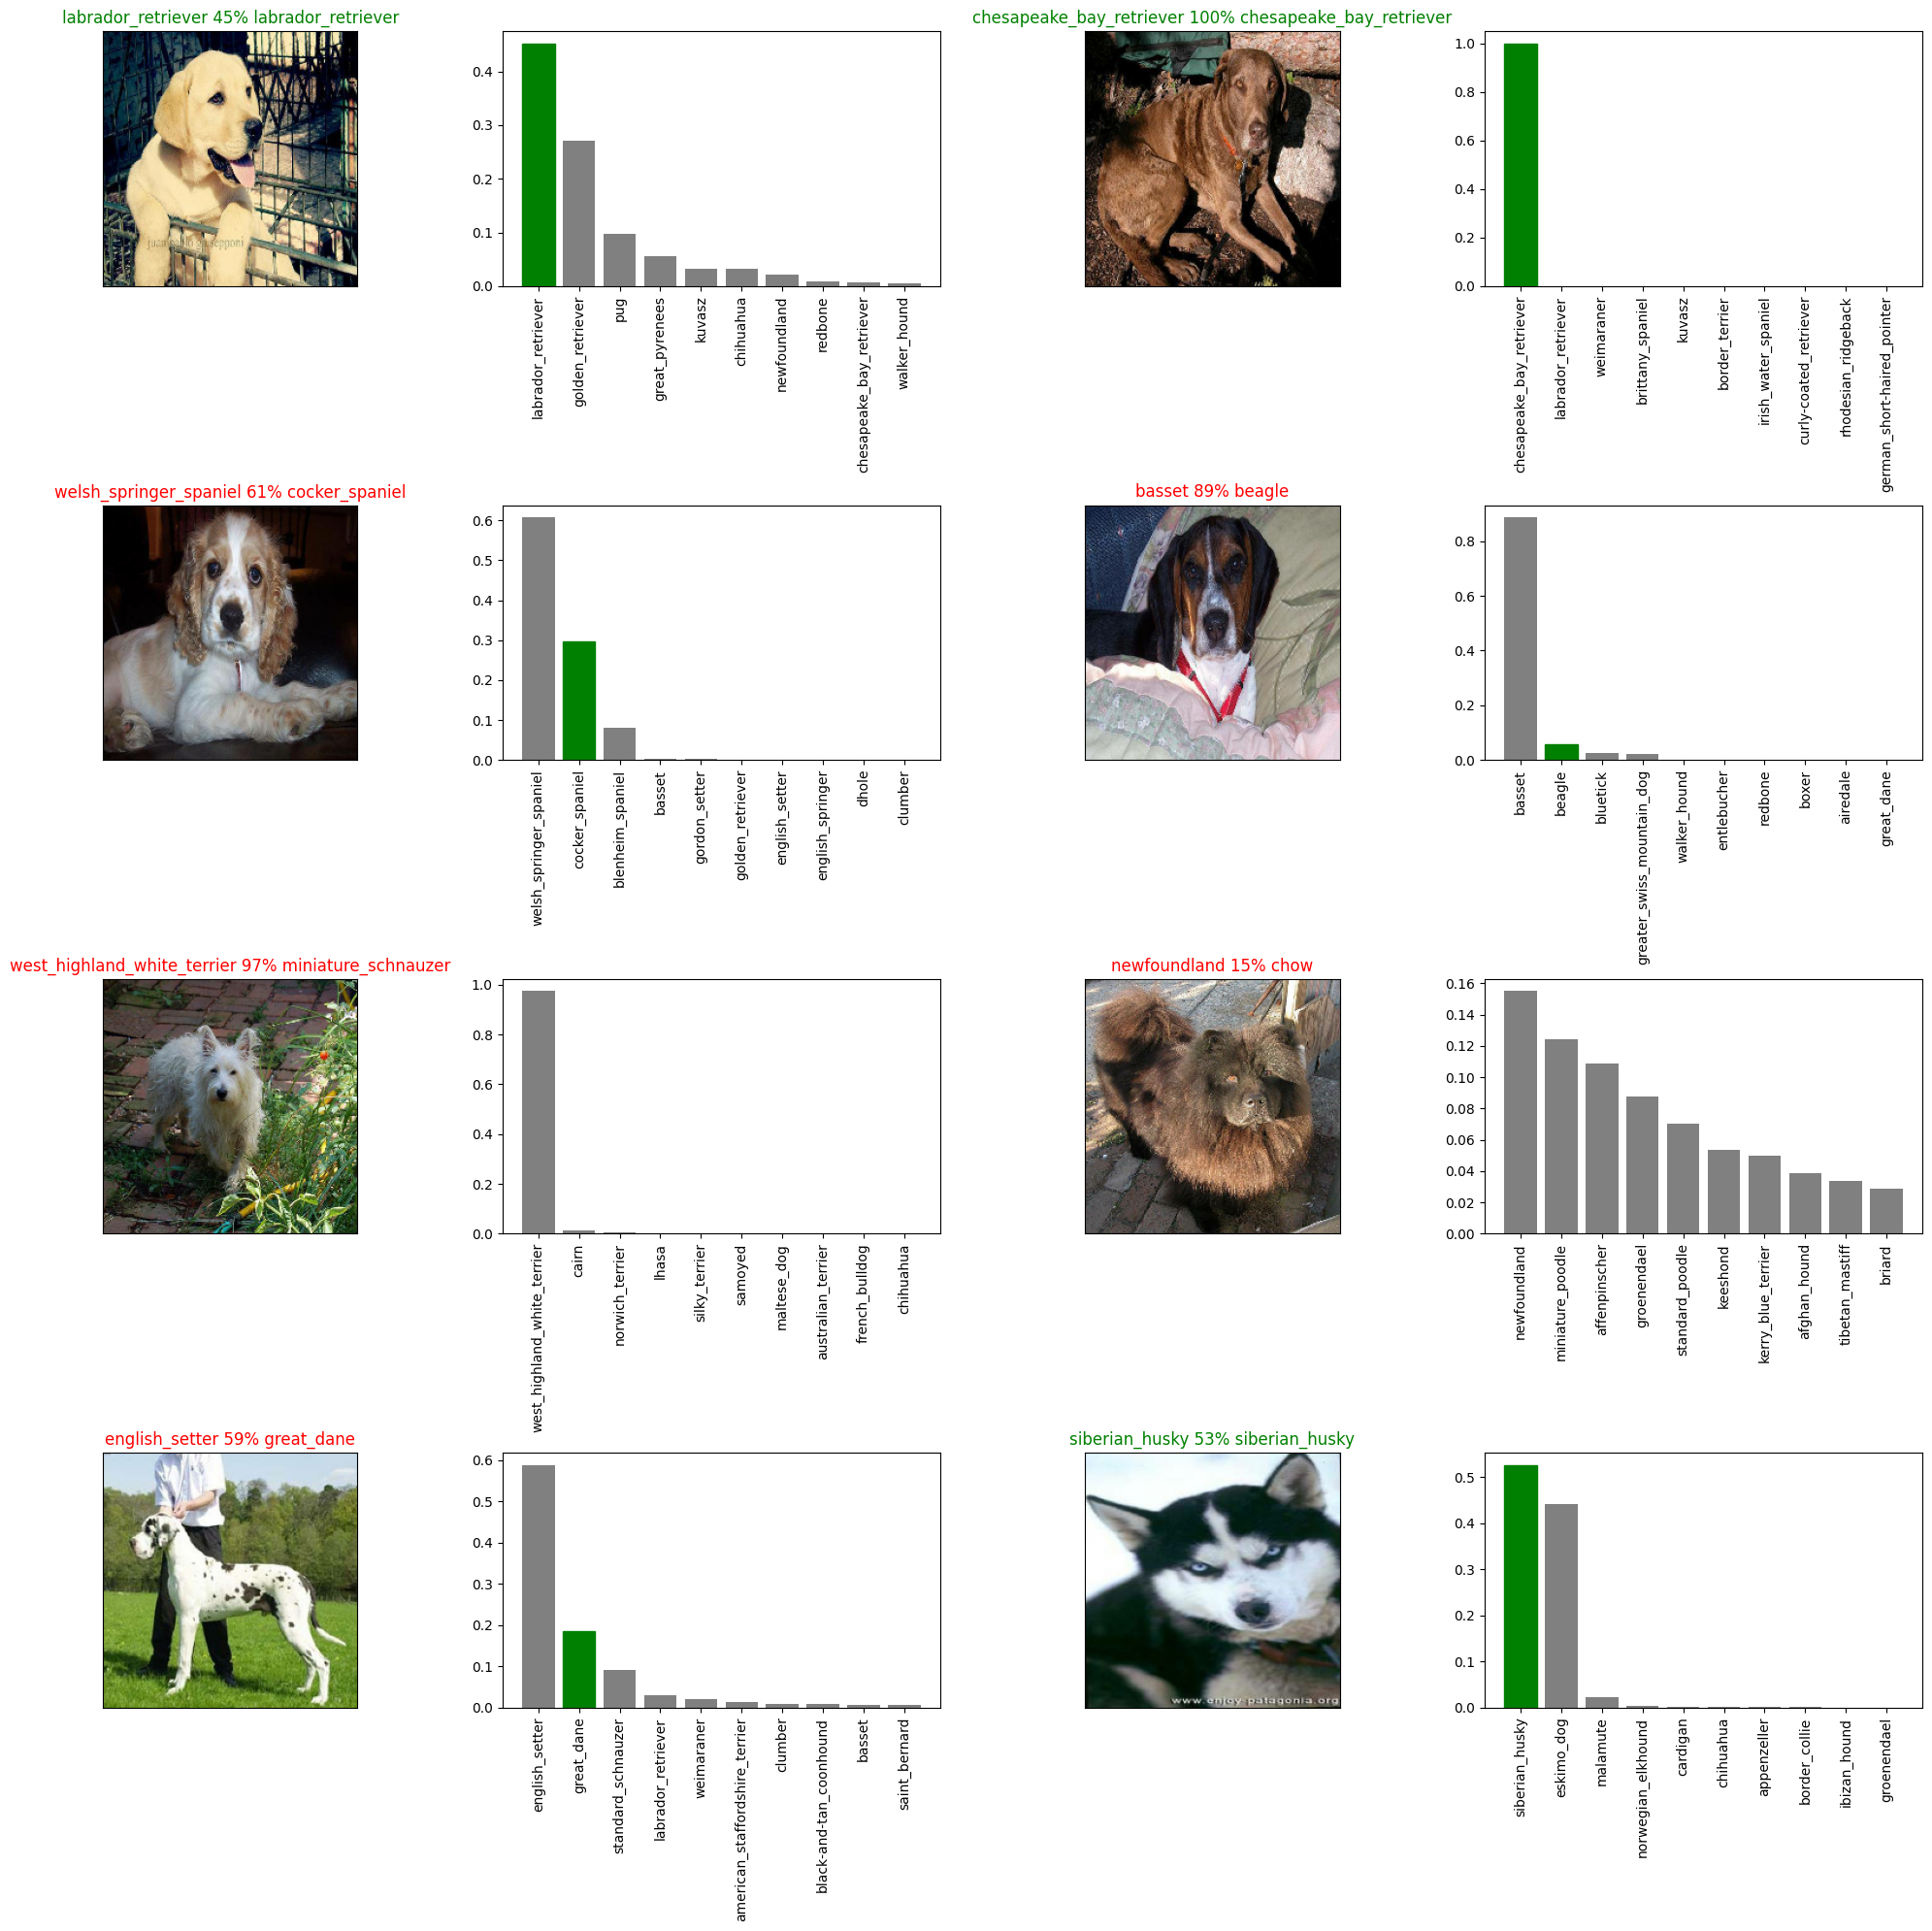

In [121]:
import matplotlib.pyplot as plt
i_mul=20
rows=4
cols=2
num_images=rows*cols
plt.figure(figsize=(10*cols,5*rows))
for i in range(num_images):
    plt.subplot(rows,2*cols,2*i+1)
    plot_pred(predictions,val_labels,val_images,i+i_mul)
    plt.subplot(rows,2*cols,2*i+2)
    plot_pred_conf(predictions,val_labels,i+i_mul)
plt.tight_layout(h_pad=1.0)
plt.show()

##Making predictions on the test dataset

In [122]:
test_filenames=['drive/MyDrive/Dog Vision/dog-breed-identification/test/'+path for path in os.listdir('drive/MyDrive/Dog Vision/dog-breed-identification/test')]
test_filenames[:10]

['drive/MyDrive/Dog Vision/dog-breed-identification/test/000621fb3cbb32d8935728e48679680e.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/00102ee9d8eb90812350685311fe5890.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/001a5f3114548acdefa3d4da05474c2e.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/00225dcd3e4d2410dd53239f95c0352f.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/002c2a3117c2193b4d26400ce431eebd.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/002c58d413a521ae8d1a5daeb35fc803.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/002f80396f1e3db687c5932d7978b196.jpg',
 'drive/MyDrive/Dog Vision/dog-breed-identification/test/0036c6bcec6031be9e62a257b1c3c442.jpg']

In [123]:
len(test_filenames)

10357

In [124]:
test_data= get_batches(x,test_data=True)

Creating test data batches...


In [125]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [126]:
test_preds=model.predict(test_data,verbose=1)

320/320 [==============================] - 42s 129ms/step


In [127]:
test_preds[:10]

array([[1.5788304e-08, 2.1008975e-09, 2.0237940e-07, ..., 1.2411502e-07,
        4.2529585e-08, 2.9327184e-08],
       [2.8055633e-12, 1.7811620e-07, 9.5704301e-08, ..., 2.6294199e-06,
        1.8659335e-05, 5.2634075e-10],
       [5.4833698e-08, 5.3267058e-06, 6.0995919e-13, ..., 4.1629754e-08,
        6.0822146e-12, 1.3059831e-06],
       ...,
       [1.2143357e-07, 2.7858699e-04, 3.3061307e-05, ..., 1.0904915e-05,
        2.7632555e-05, 1.2985375e-07],
       [2.6725383e-10, 2.3373984e-08, 1.3919845e-07, ..., 6.1077582e-05,
        4.2318419e-07, 2.2626243e-09],
       [2.4428118e-07, 4.7160855e-05, 3.6023920e-08, ..., 1.0089287e-06,
        3.4776572e-06, 1.9440335e-05]], dtype=float32)

In [128]:
test_preds.shape

(10222, 120)

##Making predictions on custom images


In [140]:
custom_image_paths=['drive/MyDrive/Dog Vision/custom-images/'+path for path in os.listdir('drive/MyDrive/Dog Vision/custom-images')]

In [141]:
custom_image_paths

['drive/MyDrive/Dog Vision/custom-images/dog2.jpg',
 'drive/MyDrive/Dog Vision/custom-images/dog3.jpg',
 'drive/MyDrive/Dog Vision/custom-images/dog1.jpg']

In [142]:
custom_data=get_batches(custom_image_paths,test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [143]:
custom_preds=model.predict(custom_data)

1/1 [==============================] - 0s 96ms/step


In [144]:
custom_preds.shape

(3, 120)

In [145]:
custom_pred_labels = [get_pred_labels(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['siberian_husky', 'miniature_poodle', 'shih-tzu']

In [146]:
custom_images=[]
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

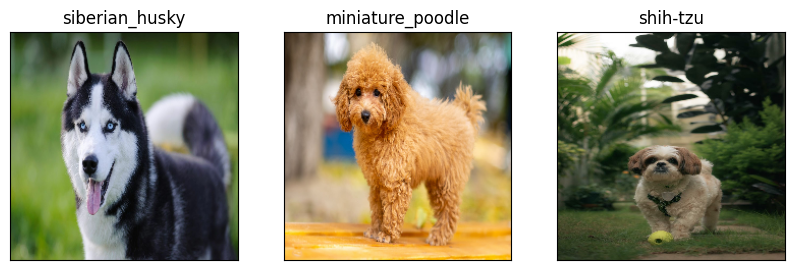

In [147]:
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

##Uploaded Image
You can upload an image of your own here

Saving dog.jpeg to dog (16).jpeg
Creating test data batches...
1/1 [==============================] - 0s 62ms/step


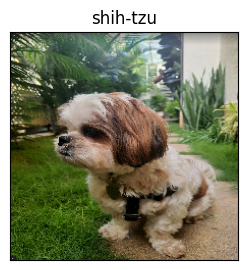

In [152]:
from google.colab import files

uploaded = files.upload()

uploaded_image_path=['drive/MyDrive/Dog Vision/uploaded-image/'+path for path in os.listdir('/content/drive/MyDrive/Dog Vision/uploaded-image')]
uploaded_data=get_batches(uploaded_image_path,test_data=True)
uploaded_pred=model.predict(uploaded_data)
uploaded_pred_label=[get_pred_labels(uploaded_pred[i]) for i in range(len(uploaded_pred))]
uploaded_image=[]
for image in uploaded_data.unbatch().as_numpy_iterator():
  uploaded_image.append(image)
plt.figure(figsize=(10, 10))
for i, image in enumerate(uploaded_image):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(uploaded_pred_label[i])
  plt.imshow(image)